In [0]:
# Predict Tesla stock price

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TSLA30.csv to TSLA30.csv


In [3]:
df = pd.read_csv('TSLA30.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17,2020-04-03,509.500000,515.489990,468.390015,480.010010,480.010010,22562100
18,2020-04-06,511.200012,521.000000,497.959991,516.239990,516.239990,14901800
19,2020-04-07,545.000000,565.000000,532.340027,545.450012,545.450012,17919800
20,2020-04-08,554.200012,557.210022,533.330017,548.840027,548.840027,12656000
21,2020-04-09,562.090027,575.179993,557.109985,573.000000,573.000000,13650000


In [4]:
df.shape

(22, 7)

In [0]:
dates = []
prices = []

In [6]:
# Delete the last row
df = df.head(len(df)-1)
df.shape

(21, 7)

In [0]:
df_dates = df.loc[:,'Date']
df_open = df.loc[:,'Open'] 

In [0]:
#Create the independent data set 'X' as dates
for date in df_dates:
  dates.append( [int(date.split('-')[2])] )
  
#Create the dependent data set 'y' as prices
for open_price in df_open:
  prices.append(float(open_price))

In [9]:
print(dates)

[[11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8]]


In [0]:
# Function to make predictions using 3 different support vector regression models with 3 different kernals
def predict_prices(dates, prices, x):
  
  #Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Train the models on the dates and prices
  svr_lin.fit(dates, prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.plot(dates, svr_lin.predict(dates), color = 'green', label='Linear model')
  plt.plot(dates, svr_poly.predict(dates), color = 'blue', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  #return all three model predictions
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

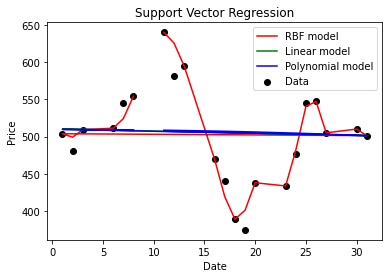

(594.4936239099827, 507.8321428571568, 508.9760077448326)


In [11]:
# Predict the price of TSLA on 2020-04-09
predicted_price = predict_prices(dates, prices, [[9]])
print(predicted_price)